In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [2]:
(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()

In [3]:
train_scaled = train_input/255.0


In [4]:
train_scaled,val_scaled,train_target,val_target = train_test_split(
    train_scaled,train_target,test_size=0.2,random_state=42
)

In [5]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28))) # 
model.add(keras.layers.Dense(100,activation='relu')) # sigmoid
model.add(keras.layers.Dropout(0.3)) # 30%를 제외시키는 규제적용
model.add(keras.layers.Dense(10,activation='softmax')) 

c:\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# epochs 돌때마다 loss, accuracy 값을 저장
# train_scaled, val_scaled 함께 훈련시킴
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7328 - loss: 0.7684 - val_accuracy: 0.8468 - val_loss: 0.4287
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8356 - loss: 0.4536 - val_accuracy: 0.8572 - val_loss: 0.3847
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8502 - loss: 0.4117 - val_accuracy: 0.8556 - val_loss: 0.3821
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8544 - loss: 0.3889 - val_accuracy: 0.8709 - val_loss: 0.3546
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8655 - loss: 0.3740 - val_accuracy: 0.8742 - val_loss: 0.3501
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8657 - loss: 0.3633 - val_accuracy: 0.8717 - val_loss: 0.3502
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8711 - loss: 0.3468 - val_accuracy: 0.8777 - val_loss: 0.3386
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8778 - loss: 0.3407 - 

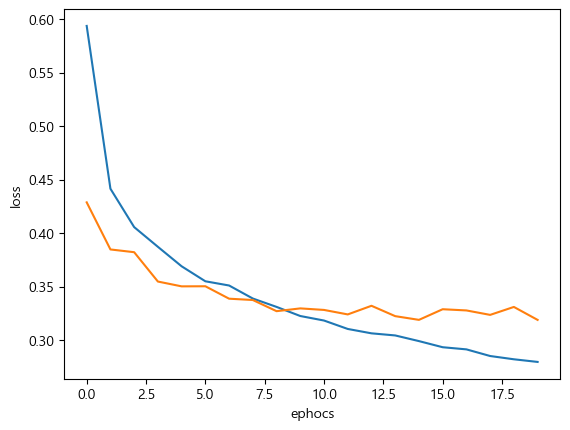

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('ephocs')
plt.ylabel('loss')
plt.show()

콜백

In [9]:
# 손실률이 가장 낮은 위치의 모델을 저장시켜줌.
# 확장자 h5, keras 확장자명 변경
# ephochs를 20번 돌 때 가장 좋은 모델을 저장시켜줌.
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.keras')
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8976 - loss: 0.2724 - val_accuracy: 0.8858 - val_loss: 0.3272
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8954 - loss: 0.2717 - val_accuracy: 0.8866 - val_loss: 0.3289
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9001 - loss: 0.2657 - val_accuracy: 0.8888 - val_loss: 0.3207
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8957 - loss: 0.2747 - val_accuracy: 0.8834 - val_loss: 0.3364
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9046 - loss: 0.2516 - val_accuracy: 0.8894 - val_loss: 0.3197
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9028 - loss: 0.2606 - val_accuracy: 0.8892 - val_loss: 0.3233
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9062 - loss: 0.2518 - val_accuracy: 0.8855 - val_loss: 0.3299
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9025 - loss: 0.2568 - 

In [13]:
# model = keras.models.load_model('best_model.keras')
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8943 - loss: 0.3291


[0.3392302691936493, 0.89083331823349]

조기 종료

In [18]:
# 11번째가  가장 좋을 때 20번까지 실행을 시킬 필요가 없음
# 조기 종료

# ModelCheckPoint : 가장 손실률이 낮은 모델을 저장
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.keras')
# complie 호출
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 조기 종료
# patience = 2 : 손실값이 2번 이상 증가되면 종료
# restore_best_weights=True : 뒤로 back을 해서 가장 좋은 모델의 위치
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, 
                    validation_data=(val_scaled, val_target), 
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9108 - loss: 0.2310 - val_accuracy: 0.8884 - val_loss: 0.3380
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9103 - loss: 0.2301 - val_accuracy: 0.8898 - val_loss: 0.3516
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9118 - loss: 0.2273 - val_accuracy: 0.8860 - val_loss: 0.3593
